<table style="width: 100%; margin-left: auto; margin-right: auto; background-color: white;">
<tbody>
<tr>

<td style="text-align: center; width: 12%;"><img src=imagens/brasil-brasao.png alt="" /></td>

<td style="width: 68%;">
<h2 style="text-align: center; margin-top: 1%;">Governo do Brasil</h2>
<h2 style="text-align: center; margin-top: 1%;">Minist&eacute;rio da Educa&ccedil;&atilde;o</h2>
<h2 style="text-align: center; margin-top: 1%;">Universidade Federal do Amazonas</h2>
<h2 style="text-align: center; margin-top: 1%;">Instituto de Computa&ccedil;&atilde;o</h2>
</td>

<td style="width: 12%;"><img src="imagens/UFAM-logo.png" alt="" /></td>

</tr>
</tbody>
</table>

# Aprendizagem de Máquina e Mineração de Dados 
### Trabalho Prático II, versão 1.0
#### Classificação de desenhos simples (Gatos, Leões e Tigres)

Professor _Marco Cristo_ 

**Alunos** (até 2):

## Introdução 

Nestes trabalhos, vamos usar o dataset do projeto Quickdraw, disponibilziado pelo Google (cf. https://quickdraw.withgoogle.com/data) para classificar imagens. No projeto Quickdraw, cerca de 15 milhões de usuários, de várias partes do mundo, iteragiram com um jogo no qual tinham que desenhar seis imagens relacionadas com cerca de 345 tópicos. Cada desenho deveria ser feito em, no máximo, vinte segundos. Uma vez que o desenho era concluído, o jogo tentava reconhecê-lo. O objetivo do projeto era compreender como seres humanos representam pictoricamente conceitos abstratos.

Neste trabalho, em particular, vamos usar o dataset do Quickdraw para criar modelos que distinguam desenhos de gatos, leões e tigres. Para cada imagem que iremos usar, foram coletadas a sua classe e a imagem _bitmap_ (28 x 28 pixels) correspondente ao esboço feito. 

O dataset disponibilizado junto com este enunciado corresponde ao arquivo `catliontiger_tr.pnz`. Este arquivo consiste de uma matriz numpy, chamada 'data', de 120 mil linhas de 785 colunas, comprimida. Cada linha corresponde a uma imagem bitmat vetorizada de 784 pixels (números entre 0 a 255) concatenada com um número inteiro que pode assumir os valores 0, 1 ou 2 de acordo com a classe da imagem (gato, leão ou tigre). Todos os desenhos escolhidos foram reconhecidos positivamente pelo Quickdraw (ou seja, a classe certa foi advinhada por uma rede neural com uma probabilidade acima de um limiar mínimo). O código a seguir lê o dataset a ser usado:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
import sys
%matplotlib inline

Using TensorFlow backend.


In [2]:
print('Python', sys.version)
print('--------')
print('Pandas:', pd.__version__)
print('Numpy:', np.__version__)
print('Keras:', keras.__version__)
print('Tensorflow:', tf.__version__)
print('Keras (TF):', tf.keras.__version__)

Python 3.6.7 (default, Oct 22 2018, 11:32:17) 
[GCC 8.2.0]
--------
Pandas: 0.24.0
Numpy: 1.16.0
Keras: 2.2.4
Tensorflow: 1.13.1
Keras (TF): 2.2.4-tf


In [3]:
animals = np.load("catliontiger_tr.npz")

In [4]:
animals['data'].shape

(120000, 785)

O código a seguir separa os atributos e a classe salvos em data e exibe um exemplo de esboço feito para cada classe de animal.

In [5]:
X = animals['data'][:,:-1]
y = pd.get_dummies(animals['data'][:,-1]).values

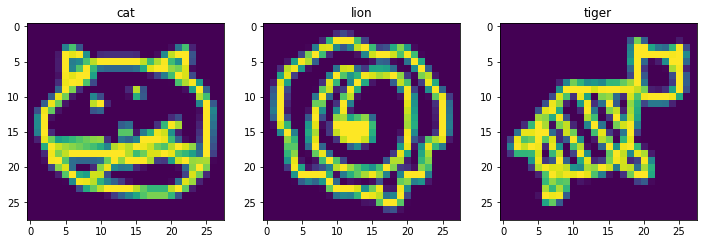

In [6]:
sample_cat = X[np.random.choice(40000)].reshape(28, 28)
sample_lion = X[40000 + np.random.choice(40000)].reshape(28, 28)
sample_tiger = X[80000 + np.random.choice(40000)].reshape(28, 28)

f, axarr = plt.subplots(1,3, figsize=[12, 4])
axarr[0].imshow(sample_cat); axarr[0].set_title('cat')
axarr[1].imshow(sample_lion); axarr[1].set_title('lion')
axarr[2].imshow(sample_tiger); axarr[2].set_title('tiger');

#### Enunciado:

Você deve **criar** os 3 modelos a seguir para classificar os desenhos.

* FNN = rede neural completamente conectada;
* CNN = rede de convolução;
* RESNET = CNN residual;
    
Os modelos devem ser treinados com, no máximo, 117 mil imagens e 20 épocas. Pelo menos 3 mil devem ser reservadas para validação. Os modelos devem apresentar desempenho de, pelo menos, 80% de acurácia. 

#### Avaliação

Os seus modelos serão avaliados usando um segundo conjunto de 3 mil imagens, que não foi fornecido com este enunciado. Para tanto, deve acompanhar o notebook a ser entregue ao professor uma versão salva do modelo com código necessário para a sua avaliação no conjunto separado. 

#### Exemplo de como salvar o modelo:

In [7]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
model_fname = 'logit_regressor.h5' # nome do arquivo 

# definicao do modelo
model = Sequential([
    Dense(1, input_shape=[10], activation='sigmoid')
])

# treinamento de exemplo
model.compile(optimizer='sgd', loss='mean_squared_error')
model.fit(np.random.rand(50, 10), np.random.randint(low=0, high=2, size=[50, 1]))

# salvando em model_fname o modelo treinado
model.save(model_fname)

In [9]:
!ls *.h5

logit_regressor.h5


#### O aluno deve entregar o seu notebook de definição de modelos e treinamento + 3 arquivos .h5, empacotados em .tar.gz:

* fnn.h5
* cnn.h5
* resnet.h5
* tp2_{Nome}\_{Sobrenome}.ipynb (Exemplo: tp2_Marco_Cristo.ipynb)

#### Espera-se que os modelos possam ser importados com o comando:

```python
from keras.models import load_model
model = load_model(fname)
```

#### E avaliados com o comando:

```python
model.evaluate(test_X, test_y)
```

#### Formatos do teste:

O tensor `test_X` possuirá os seguintes shapes: 

* (3000, 784) para a FNN;  
* (3000, 28, 28, 1) para as CNN e RESNET;  

O tensor `test_y` possuirá shape (3000, 3) e representa o _one hot encoding_ para as classes _gato_ (1,0,0), _leão_ (0,1,0) e _tigre_ (0,0,1). 

#### Nota:


Da nota dada neste trabalho, 80% corresponde ao processamento dos dados necessários e os modelos propostos para a FNN, CNN e RESNET. Os outros 20% dependerão da média dos resultados obtidos pelos modelos na coleção de testes.

#### Observações

* Consulte o professor/monitores caso haja dúvidas na especificação do problema.
* Trabalho feito por, no máximo, dois alunos. Plágio não será tolerado.
* Vocês devem construir seus modelos. Não serão aceitas soluções que usam modelos pré-construídos ou pré-treinados, como os oferecidos pelo Keras Application;
* Este trabalho foi concebido para não requerer GPUs. Contudo, algumas arquiteturas podem ficar pesadas para máquinas usando apenas CPU. Nos testes que fiz, usando batch_size de 512 e 10 épocas, as RESNET rodaram em 4 horas, o maior tempo observado de treino. Com GPUs, os mesmos modelos treinaram em 25 minutos. 